<a href="https://colab.research.google.com/github/ShanthiniR3/Social_network_analysis_project/blob/main/Web_mining_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/Web_mining_twitter.csv")
print(data.head())

   Tweet_ID        Username  \
0         1         julie81   
1         2   richardhester   
2         3  williamsjoseph   
3         4     danielsmary   
4         5      carlwarren   

                                                Text  Retweets  Likes  \
0  Party least receive say or single. Prevent pre...         2     25   
1  Hotel still Congress may member staff. Media d...        35     29   
2  Nice be her debate industry that year. Film wh...        51     25   
3  Laugh explain situation career occur serious. ...        37     18   
4  Involve sense former often approach government...        27     80   

  Timestamp                                     retweeted_user  Unnamed: 7  \
0  ########                                                2,9         NaN   
1  ########  6,8,9,12,45,67,89,123,49,23,90,25,61,65,156,1,...         NaN   
2  ########  5,77,1,66,46,2,33,44,54,65,76,21,12,11,10,9,8,...         NaN   
3  ########  1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string


In [ ]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Tokenization, removal of stopwords, and lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

print("Original Texts:\n", data['Text'])




Original Texts:
 0      Party least receive say or single. Prevent pre...
1      Hotel still Congress may member staff. Media d...
2      Nice be her debate industry that year. Film wh...
3      Laugh explain situation career occur serious. ...
4      Involve sense former often approach government...
                             ...                        
165    Federal interest PM opportunity writer. Season...
166    Part despite its south develop building. Food ...
167    Cultural contain number outside production com...
168    Who sound cell medical worry new. Whom call jo...
169    Tell knowledge them national spring draw inves...
Name: Text, Length: 170, dtype: object


In [ ]:
# Normalization (converting text to lowercase)
data['Text'] = data['Text'].str.lower()
print("\nText after Lowercasing:\n", data['Text'])


Text after Lowercasing:
 0      party least receive say or single. prevent pre...
1      hotel still congress may member staff. media d...
2      nice be her debate industry that year. film wh...
3      laugh explain situation career occur serious. ...
4      involve sense former often approach government...
                             ...                        
165    federal interest pm opportunity writer. season...
166    part despite its south develop building. food ...
167    cultural contain number outside production com...
168    who sound cell medical worry new. whom call jo...
169    tell knowledge them national spring draw inves...
Name: Text, Length: 170, dtype: object


In [ ]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    return lemmatized_tokens

# Apply preprocessing to 'Text' column
data['Processed_Text'] = data['Text'].apply(preprocess_text)

print("\nProcessed Texts:\n", data['Processed_Text'])


Processed Texts:
 0      [party, least, receive, say, single, prevent, ...
1      [hotel, still, congress, may, member, staff, m...
2      [nice, debate, industry, year, film, generatio...
3      [laugh, explain, situation, career, occur, ser...
4      [involve, sense, former, often, approach, gove...
                             ...                        
165    [federal, interest, pm, opportunity, writer, s...
166    [part, despite, south, develop, building, food...
167    [cultural, contain, number, outside, productio...
168    [sound, cell, medical, worry, new, call, job, ...
169    [tell, knowledge, national, spring, draw, inve...
Name: Processed_Text, Length: 170, dtype: object


In [ ]:
import spacy

# Load SpaCy English model
nlp = spacy.load('en_core_web_sm')

# Function to extract named entities
def extract_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
    return entities

data['Entities'] = data['Text'].apply(extract_entities)


In [ ]:
# Create a dictionary to map Tweet_ID to Username
id_to_username = dict(zip(data['Tweet_ID'], data['Username']))

# Function to convert retweeted_user IDs to usernames
def convert_to_usernames(retweeted_user_ids):
    if pd.isna(retweeted_user_ids):
        return []
    try:
        return [id_to_username[int(uid)] for uid in retweeted_user_ids.split(',') if int(uid) in id_to_username]
    except (ValueError, KeyError):
        return []

# Update 'retweeted_user' column to contain usernames instead of IDs
data['retweeted_user'] = data['retweeted_user'].apply(convert_to_usernames)

# Create links between users based on retweet interactions
interactions = []
for idx, row in data.iterrows():
    tweet_id = row['Tweet_ID']
    retweeted_users = row['retweeted_user']
    for user in retweeted_users:
        interactions.append((id_to_username[tweet_id], user))

# Convert interactions to DataFrame for analysis or visualization
interactions_df = pd.DataFrame(interactions, columns=['Source', 'Target'])
print(interactions_df.head())
print(interactions_df)

          Source          Target
0        julie81   richardhester
1        julie81     turneredgar
2  richardhester  ramirezmikayla
3  richardhester           jgood
4  richardhester     turneredgar
             Source          Target
0           julie81   richardhester
1           julie81     turneredgar
2     richardhester  ramirezmikayla
3     richardhester           jgood
4     richardhester     turneredgar
...             ...             ...
8411        kevin53          hgreen
8412        kevin53        tamara88
8413        kevin53   robertwallace
8414        kevin53       crystal63
8415        kevin53       aaronleon

[8416 rows x 2 columns]


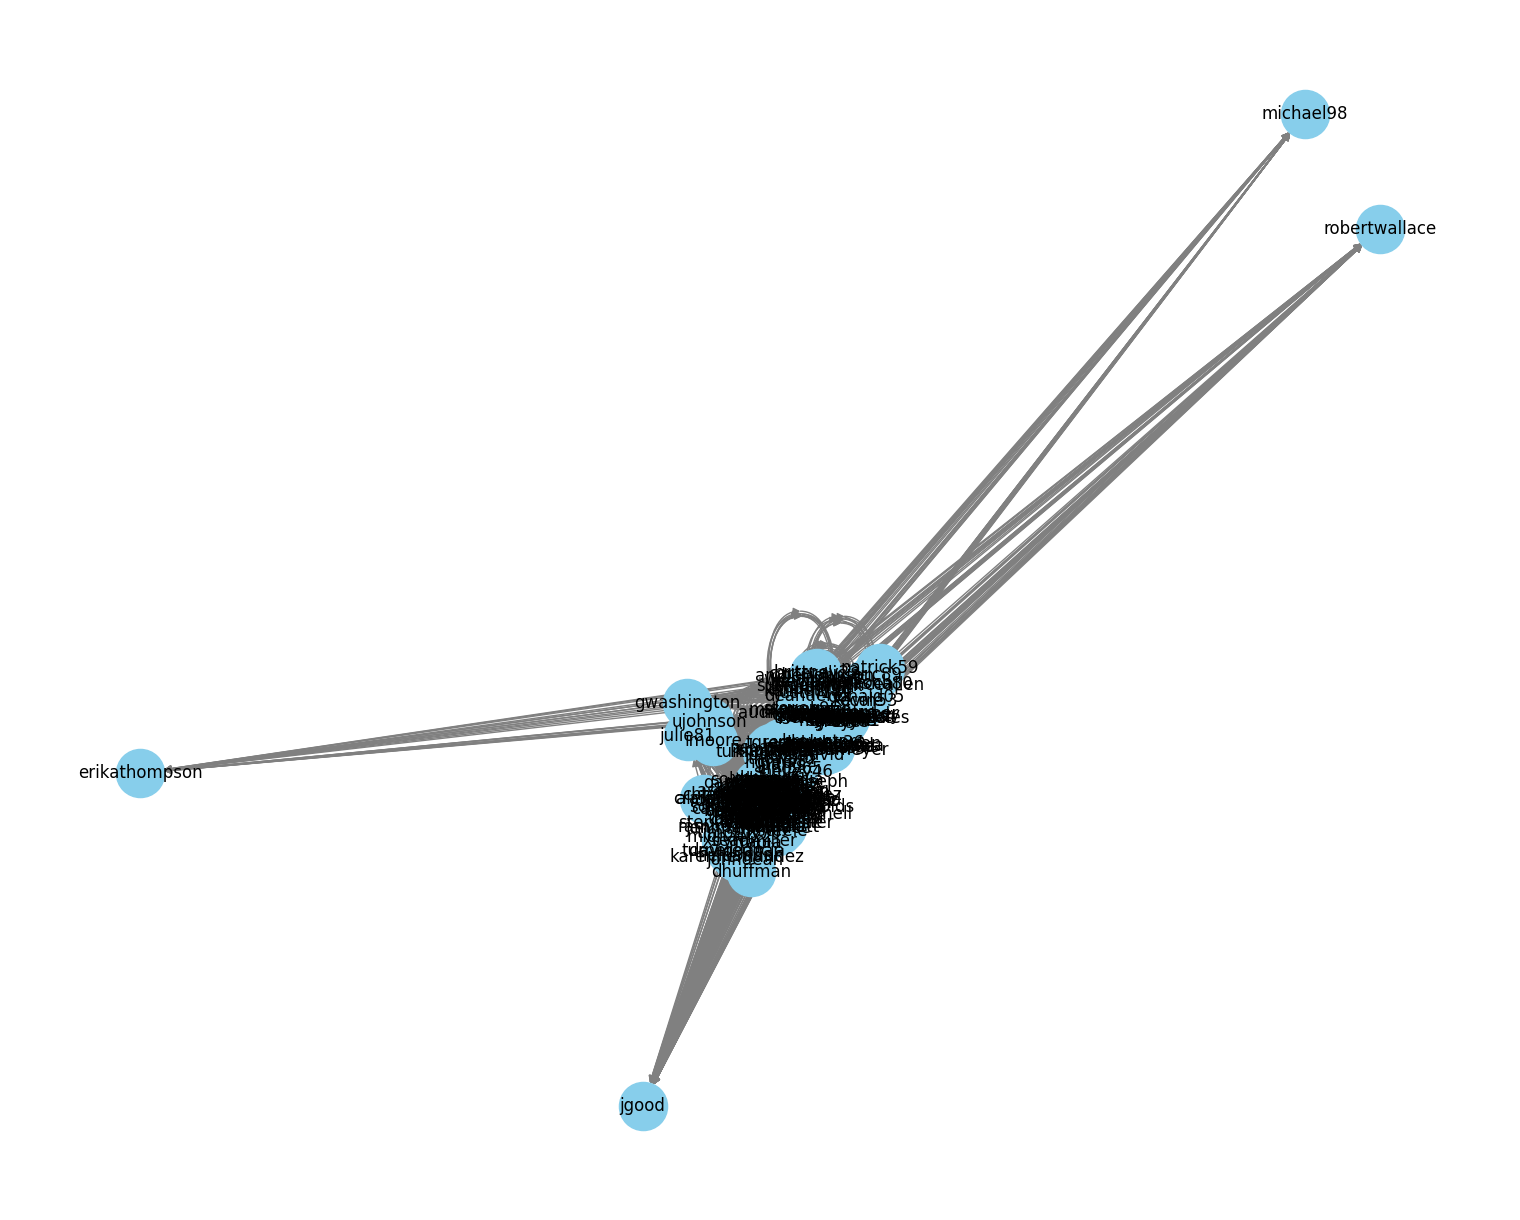

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
# Create a directed graph
G = nx.DiGraph()

# Add edges from the DataFrame
edges = [(row['Source'], row['Target']) for _, row in interactions_df.iterrows()]
G.add_edges_from(edges)
# Plot the interaction network
pos = nx.spring_layout(G, k=0.1, iterations=50)
plt.figure(figsize=(15, 12))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1200, edge_color='gray', arrows=True)

In [ ]:
# Calculate degree centrality for each node for Graph G
degree_centrality = nx.degree_centrality(G)
for node, centrality in degree_centrality.items():
    print(f"Node {node}: Degree Centrality = {centrality:.3f}")

Node julie81: Degree Centrality = 0.726
Node richardhester: Degree Centrality = 0.887
Node turneredgar: Degree Centrality = 0.857
Node ramirezmikayla: Degree Centrality = 0.899
Node jgood: Degree Centrality = 0.762
Node qdavis: Degree Centrality = 1.351
Node wberry: Degree Centrality = 1.042
Node zlewis: Degree Centrality = 0.988
Node christinahernandez: Degree Centrality = 0.429
Node swashington: Degree Centrality = 0.232
Node solomonalicia: Degree Centrality = 1.048
Node justin91: Degree Centrality = 0.911
Node drios: Degree Centrality = 0.524
Node kelsey36: Degree Centrality = 1.143
Node jilliandavis: Degree Centrality = 0.810
Node ibrown: Degree Centrality = 0.935
Node brittney22: Degree Centrality = 0.315
Node carlwarren: Degree Centrality = 0.935
Node audreymooney: Degree Centrality = 1.345
Node bettyperry: Degree Centrality = 0.893
Node michael75: Degree Centrality = 1.173
Node mollymartinez: Degree Centrality = 0.994
Node johndean: Degree Centrality = 0.732
Node tracey51: Degre

Community 1: ['bmurphy', 'lisawalker', 'sbowen', 'natasha80', 'hhardy', 'jonathanmeyer', 'wendyjames', 'tyler64', 'hgreen', 'beverlystewart', 'josephdavid', 'sweeneyjose', 'eric89', 'whitneyarnold', 'daviskevin', 'ibrown', 'xmeyer', 'xbender', 'williamjones', 'brittney22', 'ucastillo', 'foxmichael', 'kevin53', 'greenesteven', 'deanderek', 'tracey51', 'nking', 'fsmith', 'michael98', 'teresa28', 'sherry41', 'patrick59', 'julia48', 'qkoch', 'sullivanmark', 'mgillespie', 'wberry', 'tgregory', 'carteralicia', 'wjohnson', 'morrowloretta', 'showard', 'ojordan', 'pchandler', 'crystal63', 'anagardner', 'garciamichele', 'holson', 'zlewis', 'bernardturner', 'dcole', 'dhuffman', 'mallory62', 'lvincent', 'zvega', 'dawn47', 'robertwallace', 'solomonalicia', 'erikathompson', 'timothy90', 'tamara88', 'johnboyd', 'jilliandavis', 'cindy65', 'scottandrea', 'stonejoshua', 'michelecruz', 'amberjohnson', 'karenhernandez', 'steven96', 'bishopthomas', 'chase15', 'lawrenceallen', 'michael75', 'adamsjessica', '

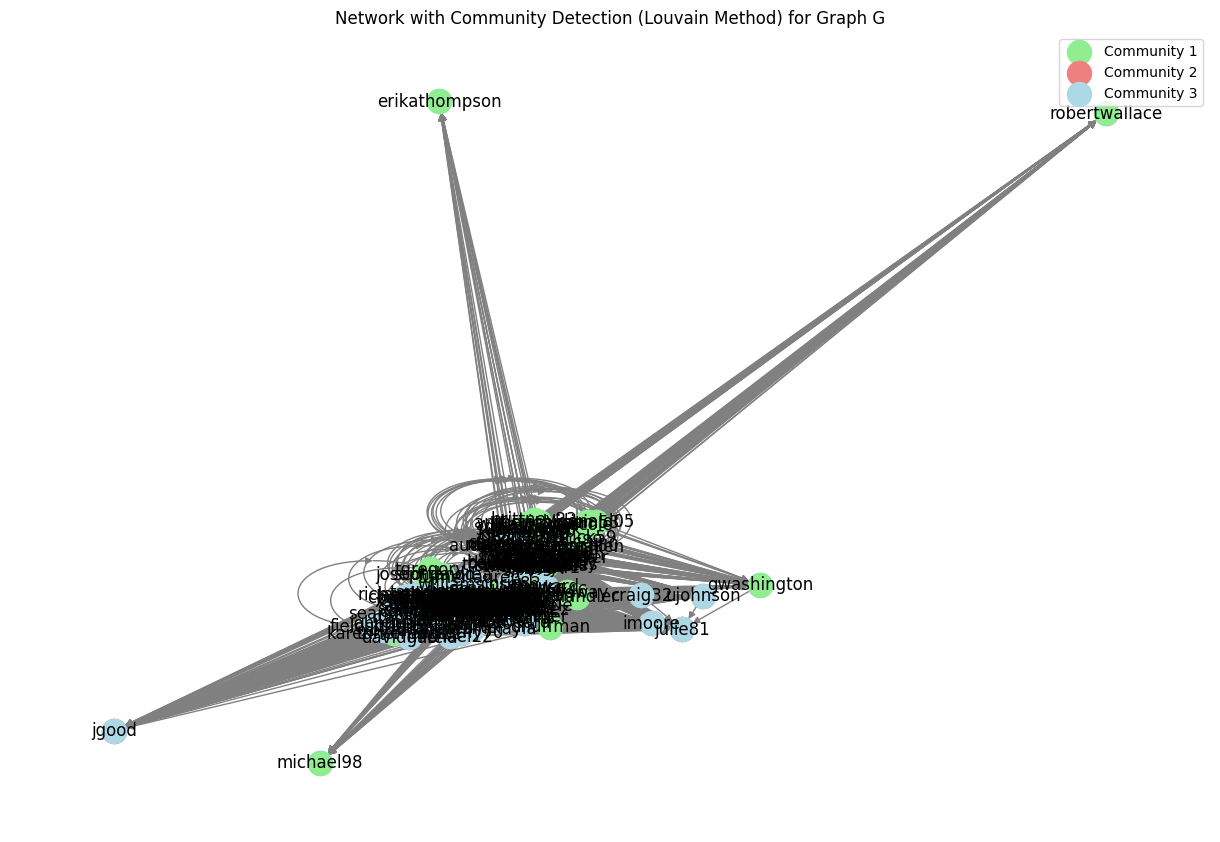

In [ ]:
# Computing communities using the Louvain method for Graph G
communities = nx.algorithms.community.greedy_modularity_communities(G)
for i, community in enumerate(communities, 1):
    print(f"Community {i}: {list(community)}")

# Visualize the network with communities
pos = nx.spring_layout(G, k=0.15)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', edge_color='gray')
nx.draw_networkx_nodes(G, pos, nodelist=communities[0], node_color='lightgreen', label='Community 1')
nx.draw_networkx_nodes(G, pos, nodelist=communities[1], node_color='lightcoral', label='Community 2')
nx.draw_networkx_nodes(G, pos, nodelist=communities[1], node_color='lightblue', label='Community 3')
plt.title('Network with Community Detection (Louvain Method) for Graph G')
plt.legend()
plt.show()


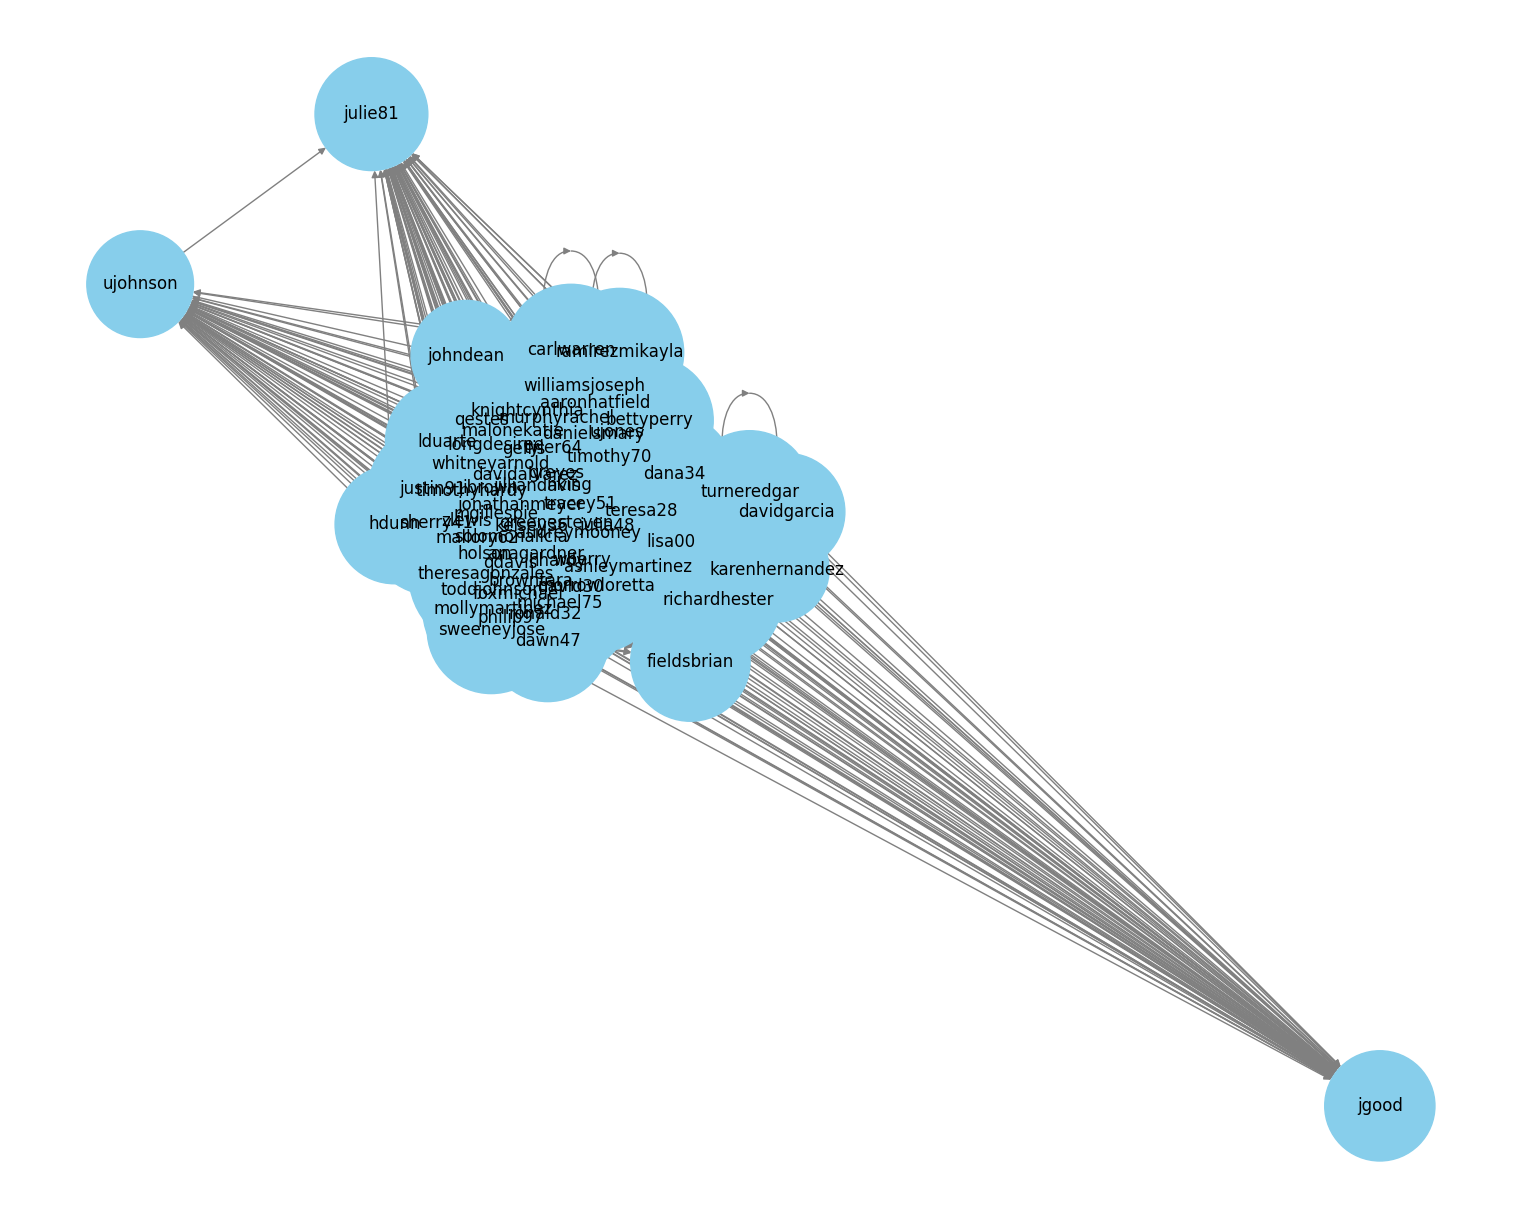

In [ ]:

# Create an empty directed graph
G = nx.DiGraph()
for _, row in interactions_df.iterrows():
    source = row['Source']
    target = row['Target']
    G.add_edge(source, target)

plt.figure(figsize=(15, 12))
# Filter nodes with degree less than a threshold
filtered_nodes = [node for node, degree in G.degree() if degree >= 120]
filtered_G = G.subgraph(filtered_nodes)

# Plot the filtered network
pos = nx.spring_layout(filtered_G, k=0.1, iterations=50)
node_sizes = [100 * filtered_G.degree[node] for node in filtered_G.nodes()]
nx.draw(filtered_G, pos, with_labels=True, node_color='skyblue', node_size=node_sizes, edge_color='gray', arrows=True)

Community 1: ['davidalvarez', 'browntara', 'anagardner', 'hhardy', 'jonathanmeyer', 'zlewis', 'holson', 'kelsey36', 'tyler64', 'mallory62', 'sweeneyjose', 'dawn47', 'whitneyarnold', 'solomonalicia', 'ibrown', 'greyes', 'jilliandavis', 'foxmichael', 'greenesteven', 'toddjohnson', 'tracey51', 'nking', 'michael75', 'sherry41', 'malonekatie', 'julia48', 'gellis', 'theresagonzales', 'ronald32', 'mgillespie', 'wberry', 'longdesiree', 'morrowloretta', 'philip97']
Community 2: ['ramirezmikayla', 'davidgarcia', 'lisa00', 'richardhester', 'karenhernandez', 'johndean', 'qdavis', 'ashleymartinez', 'jgood', 'turneredgar', 'teresa28', 'aaronhatfield', 'justin91', 'timothyhardy', 'murphyrachel', 'ujohnson', 'carlwarren', 'julie81', 'david30', 'fieldsbrian', 'timothy70', 'danielsmary', 'lduarte', 'audreymooney', 'dana34', 'williamsjoseph', 'hdunn', 'bettyperry']
Community 3: ['ujones', 'qestes', 'knightcynthia', 'mollymartinez']


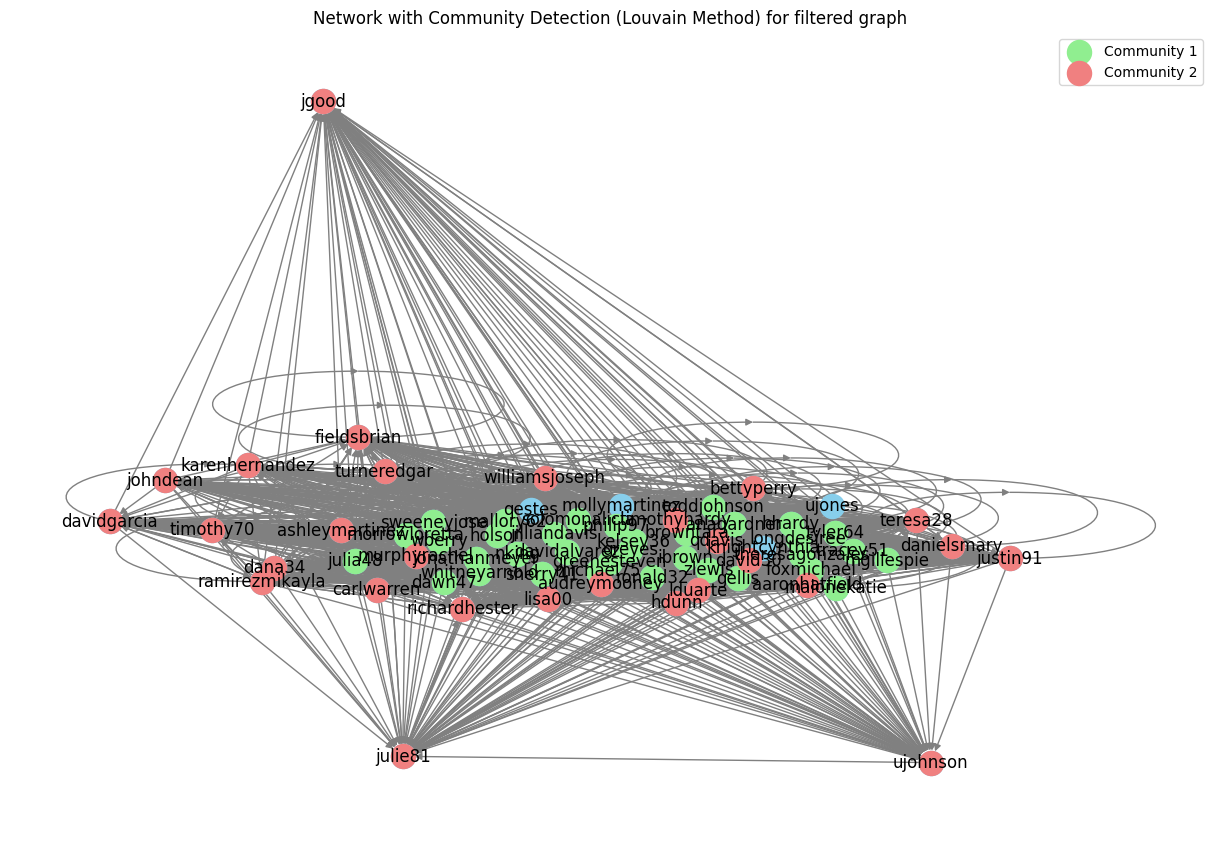

In [ ]:
# Compute communities using the Louvain method for filtered graph
communities = nx.algorithms.community.greedy_modularity_communities(filtered_G)
for i, community in enumerate(communities, 1):
    print(f"Community {i}: {list(community)}")

# Visualize the network with communities
pos = nx.spring_layout(filtered_G, k=0.15)
plt.figure(figsize=(12, 8))
nx.draw(filtered_G, pos, with_labels=True, node_size=300, node_color='skyblue', edge_color='gray')
nx.draw_networkx_nodes(filtered_G, pos, nodelist=communities[0], node_color='lightgreen', label='Community 1')
nx.draw_networkx_nodes(filtered_G, pos, nodelist=communities[1], node_color='lightcoral', label='Community 2')
plt.title('Network with Community Detection (Louvain Method) for filtered graph')
plt.legend()
plt.show()

In [ ]:
# Calculate degree centrality for each node for filtered graph
degree_centrality = nx.degree_centrality(filtered_G)
for node, centrality in degree_centrality.items():
    print(f"Node {node}: Degree Centrality = {centrality:.3f}")

Node ramirezmikayla: Degree Centrality = 1.308
Node davidalvarez: Degree Centrality = 1.754
Node richardhester: Degree Centrality = 1.277
Node browntara: Degree Centrality = 1.862
Node ashleymartinez: Degree Centrality = 1.508
Node anagardner: Degree Centrality = 1.415
Node knightcynthia: Degree Centrality = 1.723
Node jonathanmeyer: Degree Centrality = 1.677
Node hhardy: Degree Centrality = 1.446
Node turneredgar: Degree Centrality = 1.215
Node zlewis: Degree Centrality = 1.400
Node holson: Degree Centrality = 1.646
Node qestes: Degree Centrality = 1.508
Node kelsey36: Degree Centrality = 1.846
Node philip97: Degree Centrality = 1.677
Node tyler64: Degree Centrality = 1.585
Node timothyhardy: Degree Centrality = 1.969
Node mallory62: Degree Centrality = 1.369
Node sweeneyjose: Degree Centrality = 1.308
Node ujohnson: Degree Centrality = 0.908
Node carlwarren: Degree Centrality = 1.385
Node julie81: Degree Centrality = 1.015
Node dawn47: Degree Centrality = 1.185
Node solomonalicia: De

In [43]:
from pyspark.sql import SparkSession
from graphframes import GraphFrame
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder \
    .appName("GraphFrames in Python") \
    .getOrCreate()

# Get unique usernames from both 'Source' and 'Target' columns
unique_usernames = pd.concat([interactions_df['Source'], interactions_df['Target']]).unique()

# Create a vertices DataFrame with unique usernames
vertices = pd.DataFrame({'id': unique_usernames})

# Display the vertices DataFrame
print("Vertices:")
print(vertices)

# Create edges DataFrame from 'Source' and 'Target' columns
edges = interactions_df.rename(columns={'Source': 'src', 'Target': 'dst'})

# Display the edges DataFrame
print("\nEdges:")
print(edges)

# Stop the Spark session
spark.stop()


KeyError: 'Source'

In [47]:
!pip install pyspark graphframes networkx matplotlib
from pyspark.sql import SparkSession
from graphframes import GraphFrame
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder \
    .appName("GraphFrames in Python") \
    .getOrCreate()

# Get unique usernames from both 'Source' and 'Target' columns
unique_usernames = pd.concat([interactions_df['Source'], interactions_df['Target']]).unique()

# Create a vertices DataFrame with unique usernames
vertices = pd.DataFrame({'id': unique_usernames})

print("Vertices:")
print(vertices)
edges = interactions_df.rename(columns={'Source': 'src', 'Target': 'dst'})
print("\nEdges:")
print(edges)

# Stop the Spark session
spark.stop()


Vertices:
               id
0         julie81
1   richardhester
2     turneredgar
3  ramirezmikayla
4           jgood

Edges:
             src             dst
0        julie81   richardhester
1        julie81     turneredgar
2  richardhester  ramirezmikayla
3  richardhester           jgood
4  richardhester     turneredgar


In [48]:
#!pip install python-igraph
import pandas as pd
from igraph import Graph,plot
import matplotlib.pyplot as plt

data={
   'Source': ['julie81', 'julie81', 'richardhester', 'richardhester', 'richardhester'],
    'Target': ['richardhester', 'turneredgar', 'ramirezmikayla', 'jgood', 'turneredgar']
}

interactions_df = pd.DataFrame(data)

# Create a list of unique vertices (nodes)
vertices = list(set(interactions_df['Source']).union(set(interactions_df['Target'])))

# Create edges as tuples of (source, target)
edges = list(zip(interactions_df['Source'], interactions_df['Target']))

# Create an igraph Graph object
G = Graph()
G.add_vertices(vertices)
G.add_edges(edges)

# Compute and print degree centrality for each vertex
degree_centrality = G.degree()
for vertex, degree in zip(vertices, degree_centrality):
    print(f"Degree Centrality of {vertex}: {degree}")


Degree Centrality of turneredgar: 2
Degree Centrality of ramirezmikayla: 1
Degree Centrality of richardhester: 4
Degree Centrality of julie81: 2
Degree Centrality of jgood: 1


In [49]:
#!pip install igraph
import igraph as ig
import networkx as nx
import time

def ig_vs_nx(interactions_df):
    g1 = ig.Graph(directed=True)
    g2 = nx.DiGraph()

    node_set = set(interactions_df['Source']).union(set(interactions_df['Target']))
    edge_set = [(row['Source'], row['Target']) for _, row in interactions_df.iterrows()]

    time_start = time.time()
    # Add nodes and edges to igraph graph (g1)
    g1.add_vertices(list(node_set))
    g1.add_edges(edge_set)
    time_ig = time.time()

    # Add nodes and edges to networkx graph (g2)
    g2.add_nodes_from(node_set)
    g2.add_edges_from(edge_set)
    time_nx = time.time()

    print("------------------------------------------------------")
    print(f"Node num: {len(node_set)}; Edge num: {len(edge_set)}")
    print(f"ig time: {time_ig - time_start}s")
    print(f"nx time: {time_nx - time_ig}s")
    print(f"ig/nx: {(time_ig - time_start)/(time_nx - time_ig)}")


if __name__ == "__main__":

    data = interactions_df
    # Compare igraph vs. networkx performance
    ig_vs_nx(interactions_df)
print(interactions_df)

------------------------------------------------------
Node num: 5; Edge num: 5
ig time: 5.555152893066406e-05s
nx time: 3.600120544433594e-05s
ig/nx: 1.5430463576158941
          Source          Target
0        julie81   richardhester
1        julie81     turneredgar
2  richardhester  ramirezmikayla
3  richardhester           jgood
4  richardhester     turneredgar


In [50]:
# Create an empty graph
G = Graph()

# Extract unique sources and targets
nodes = list(set(interactions_df['Source']).union(set(interactions_df['Target'])))
G.add_vertices(nodes)
for _, row in interactions_df.iterrows():
    source = row['Source']
    target = row['Target']
    G.add_edge(source, target)

# Display basic information about the graph
print(G)
print("Number of vertices:", G.vcount())
print("Number of edges:", G.ecount())


IGRAPH UN-- 5 5 --
+ attr: name (v)
+ edges (vertex names):
richardhester--julie81, turneredgar--julie81, ramirezmikayla--richardhester,
richardhester--jgood, turneredgar--richardhester
Number of vertices: 5
Number of edges: 5


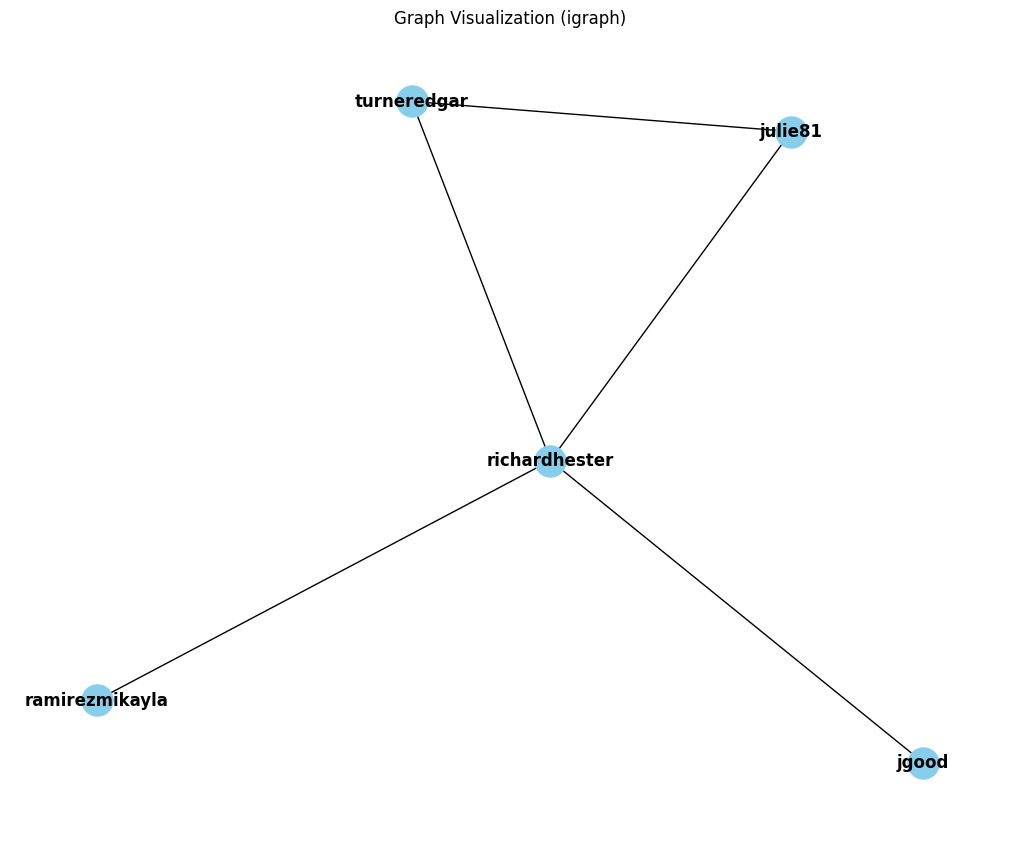

In [51]:
# Convert igraph graph to NetworkX graph
nx_G = nx.Graph()
nx_G.add_nodes_from(G.vs["name"])
nx_G.add_edges_from([(G.vs[e.source]["name"], G.vs[e.target]["name"]) for e in G.es])

# Save the graph as a GraphML file
nx.write_graphml(nx_G, "graph.graphml")

# Visualize the graph using NetworkX (optional)
plt.figure(figsize=(10, 8))
nx.draw(nx_G, with_labels=True, node_size=500, node_color="skyblue", font_size=12, font_weight="bold")
plt.title("Graph Visualization (igraph)")
plt.show()

In [52]:
interactions_df = pd.DataFrame(interactions, columns=['Source', 'Target'])

# Display the first 30 rows
print(interactions_df.head(30))

           Source              Target
0         julie81       richardhester
1         julie81         turneredgar
2   richardhester      ramirezmikayla
3   richardhester               jgood
4   richardhester         turneredgar
5   richardhester              qdavis
6   richardhester              wberry
7   richardhester              zlewis
8   richardhester  christinahernandez
9   richardhester         swashington
10  richardhester       solomonalicia
11  richardhester            justin91
12  richardhester               drios
13  richardhester            kelsey36
14  richardhester        jilliandavis
15  richardhester              ibrown
16  richardhester          brittney22
17  richardhester             julie81
18  richardhester          carlwarren
19  richardhester        audreymooney
20  richardhester          bettyperry
21  richardhester           michael75
22  richardhester       mollymartinez
23  richardhester            johndean
24  richardhester            tracey51
25  richardh

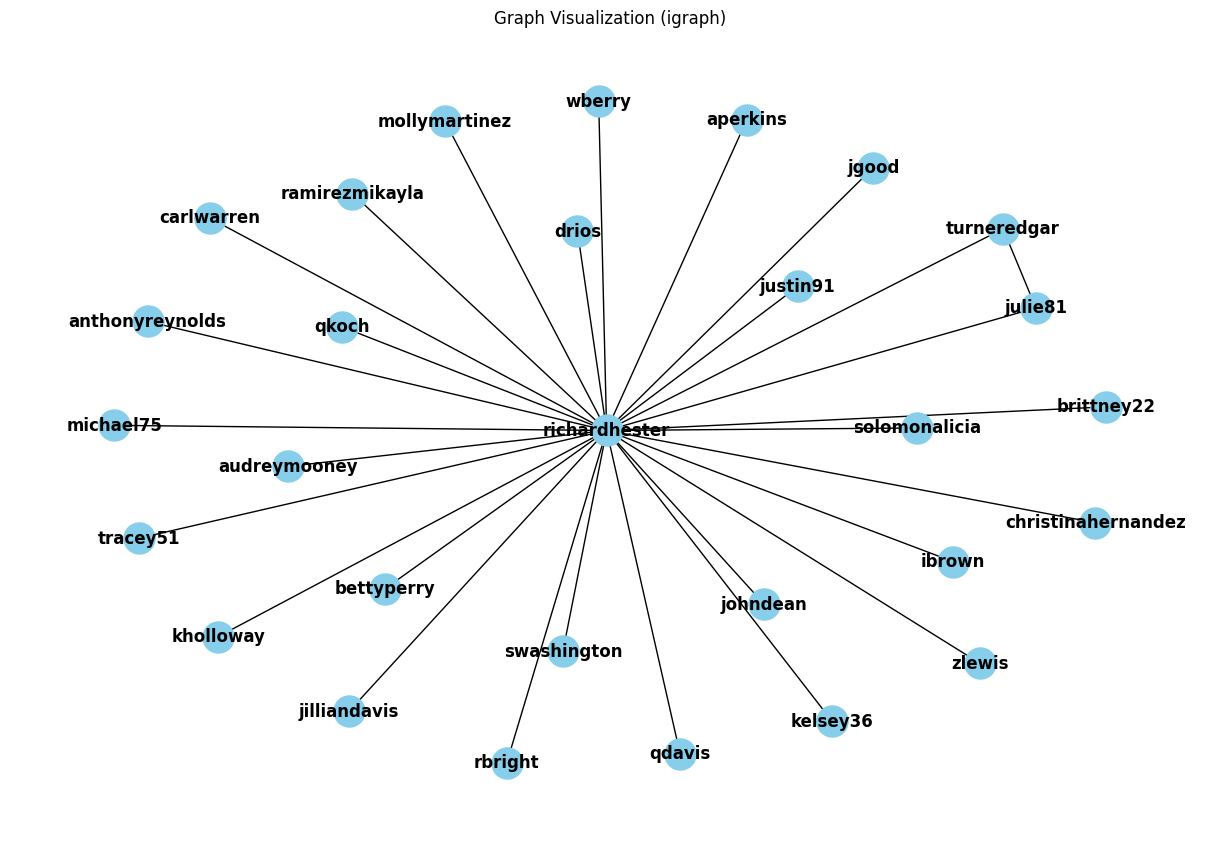

In [53]:
interactions = [
    ("julie81", "richardhester"),
    ("julie81", "turneredgar"),
    ("richardhester", "ramirezmikayla"),
    ("richardhester", "jgood"),
    ("richardhester", "turneredgar"),
    ("richardhester", "qdavis"),
    ("richardhester", "wberry"),
    ("richardhester", "zlewis"),
    ("richardhester", "christinahernandez"),
    ("richardhester", "swashington"),
    ("richardhester", "solomonalicia"),
    ("richardhester", "justin91"),
    ("richardhester", "drios"),
    ("richardhester", "kelsey36"),
    ("richardhester", "jilliandavis"),
    ("richardhester", "ibrown"),
    ("richardhester", "brittney22"),
    ("richardhester", "julie81"),
    ("richardhester", "carlwarren"),
    ("richardhester", "audreymooney"),
    ("richardhester", "bettyperry"),
    ("richardhester", "michael75"),
    ("richardhester", "mollymartinez"),
    ("richardhester", "johndean"),
    ("richardhester", "tracey51"),
    ("richardhester", "aperkins"),
    ("richardhester", "rbright"),
    ("richardhester", "kholloway"),
    ("richardhester", "anthonyreynolds"),
    ("richardhester", "qkoch")
]

# Convert interactions to DataFrame for analysis or visualization
interactions_df = pd.DataFrame(interactions, columns=['Source', 'Target'])

# Create an empty graph
G = Graph()
nodes = list(set(interactions_df['Source']).union(set(interactions_df['Target'])))

G.add_vertices(nodes)
for _, row in interactions_df.iterrows():
    source = row['Source']
    target = row['Target']
    G.add_edge(source, target)

# Convert igraph graph to NetworkX graph
nx_G = nx.Graph()
nx_G.add_nodes_from(G.vs["name"])
nx_G.add_edges_from([(G.vs[e.source]["name"], G.vs[e.target]["name"]) for e in G.es])

# Save the graph as a GraphML file
nx.write_graphml(nx_G, "graph.graphml")

# Visualize the graph using NetworkX
plt.figure(figsize=(12, 8))
nx.draw(nx_G, with_labels=True, node_size=500, node_color="skyblue", font_size=12, font_weight="bold")
plt.title("Graph Visualization (igraph)")
plt.show()


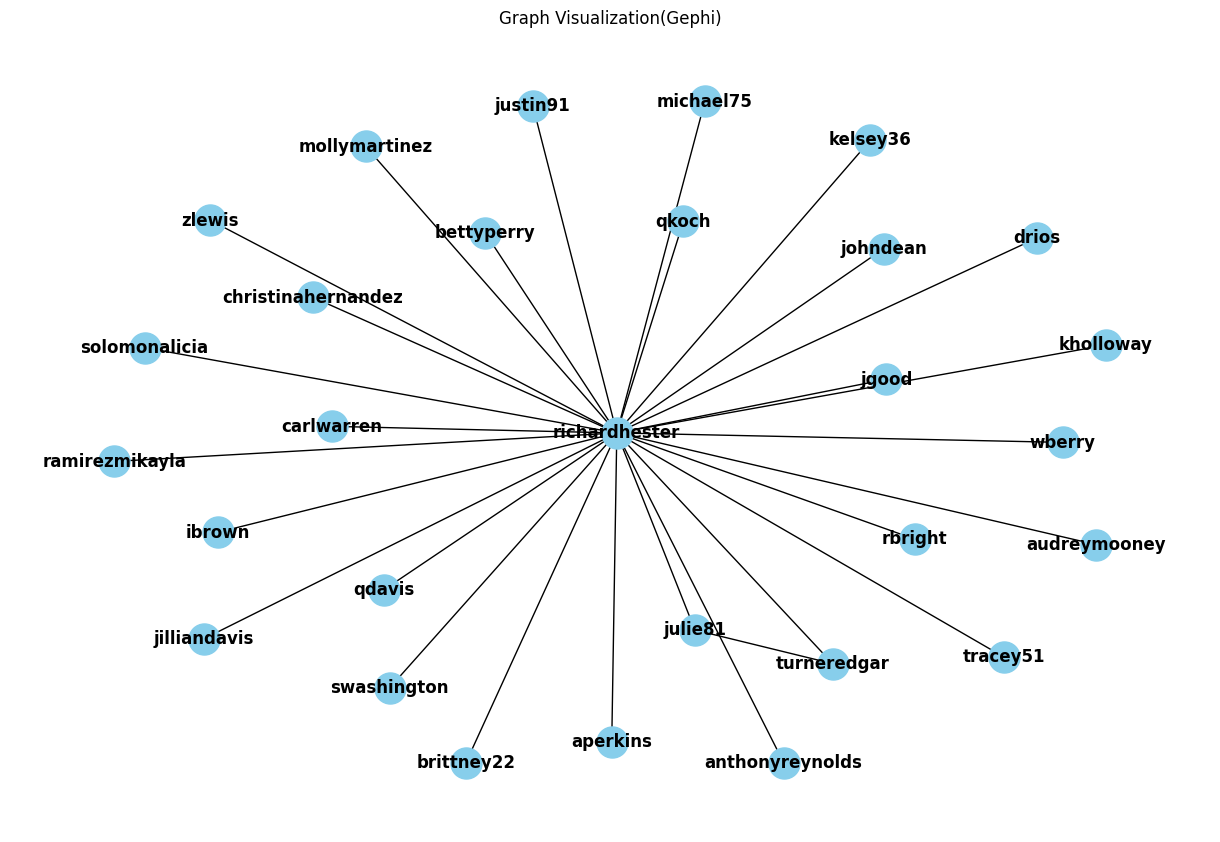

Exported graph to Gephi format (GraphML): graph.graphml


In [54]:
# Import necessary modules
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Define the interactions data
interactions = [
    ("julie81", "richardhester"),
    ("julie81", "turneredgar"),
    ("richardhester", "ramirezmikayla"),
    ("richardhester", "jgood"),
    ("richardhester", "turneredgar"),
    ("richardhester", "qdavis"),
    ("richardhester", "wberry"),
    ("richardhester", "zlewis"),
    ("richardhester", "christinahernandez"),
    ("richardhester", "swashington"),
    ("richardhester", "solomonalicia"),
    ("richardhester", "justin91"),
    ("richardhester", "drios"),
    ("richardhester", "kelsey36"),
    ("richardhester", "jilliandavis"),
    ("richardhester", "ibrown"),
    ("richardhester", "brittney22"),
    ("richardhester", "julie81"),
    ("richardhester", "carlwarren"),
    ("richardhester", "audreymooney"),
    ("richardhester", "bettyperry"),
    ("richardhester", "michael75"),
    ("richardhester", "mollymartinez"),
    ("richardhester", "johndean"),
    ("richardhester", "tracey51"),
    ("richardhester", "aperkins"),
    ("richardhester", "rbright"),
    ("richardhester", "kholloway"),
    ("richardhester", "anthonyreynolds"),
    ("richardhester", "qkoch")
]

# Convert interactions to DataFrame for analysis or visualization
interactions_df = pd.DataFrame(interactions, columns=['Source', 'Target'])

# Create a graph using NetworkX
G = nx.Graph()

# Add edges from the interactions data
G.add_edges_from(interactions)

# Save the graph as a GraphML file
nx.write_graphml(G, "graph.graphml")

# Display the graph using NetworkX
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=500, node_color="skyblue", font_size=12, font_weight="bold")
plt.title("Graph Visualization(Gephi)")
plt.show()

# Export the graph to Gephi
print("Exported graph to Gephi format (GraphML): graph.graphml")
